<a href="https://colab.research.google.com/github/SuhasMartha/Deep-Learning/blob/main/DL_Project_Traffic_Sign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import kagglehub

path = kagglehub.dataset_download("tuanai/traffic-signs-dataset")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/traffic-signs-dataset


# Training and Testing Data

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pandas as pd
import matplotlib.pyplot as plt

# Optionally load CSV for class mapping
class_mapping_df = pd.read_csv('/kaggle/input/traffic-signs-dataset/labels.csv')  # CSV with columns: "ClassId", "Name"
print(class_mapping_df.head())
print(class_mapping_df.columns)

# Load the training dataset from directory
train_dir = '/kaggle/input/traffic-signs-dataset/DATA'
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(32, 32),  # Resize images to 32x32; adjust if necessary
    shuffle=True,
    seed=42
)

# Load the test dataset
test_dir = '/kaggle/input/traffic-signs-dataset/TEST'
test_ds = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(32, 32),
    shuffle=False
)

   ClassId                  Name
0        0   Speed limit (5km/h)
1        1  Speed limit (15km/h)
2        2  Speed limit (30km/h)
3        3  Speed limit (40km/h)
4        4  Speed limit (50km/h)
Index(['ClassId', 'Name'], dtype='object')
Found 5683 files belonging to 52 classes.
Found 433 files belonging to 52 classes.


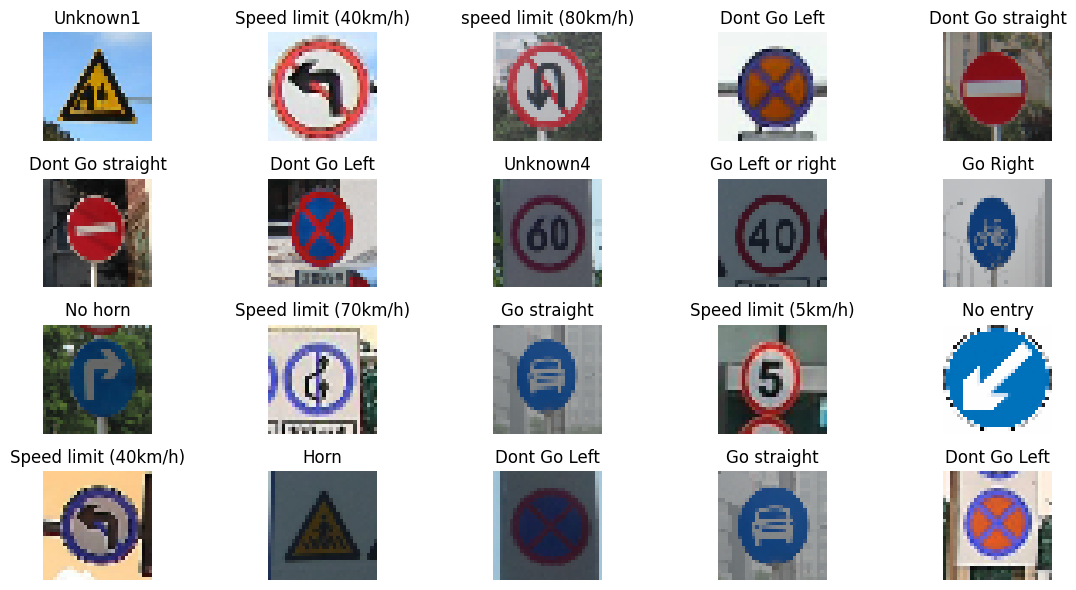

In [68]:
t_img, label = next(iter(train_ds))  # Get a batch of images and labels

def plotImages(img_arr, labels, df):
    fig, axs = plt.subplots(4, 5, figsize=(12, 6))  # Create subplots
    axs = axs.flatten()  # Flatten the 2D array of axes for easier iteration
    for i, ax in enumerate(axs[:20]):  # Iterate through the first 20 images
        img = img_arr[i].numpy().astype("uint8")  # Convert to uint8 for imshow
        ax.imshow(img)
        class_id = np.argmax(labels[i])  # Get the predicted class ID
        label_name = df[df['ClassId'] == class_id]['Name'].values[0]  # Get the label name
        ax.set_title(label_name)
        ax.axis('off')  # Turn off axis ticks
    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()  # Display the plot

plotImages(t_img, label, class_mapping_df)  # Call the function with correct data

# CNN Model

In [40]:
from tensorflow.keras import layers, models

# Get the number of classes from the dataset's class_names attribute
num_classes = len(train_ds.class_names)  # Access class_names instead

# Build CNN model
cnn_model = models.Sequential([
    # Scale pixel values to [0, 1]
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),

    # Convolutional block 1
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Convolutional block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax') # Use num_classes here
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_history = cnn_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.1450 - loss: 3.4840 - val_accuracy: 0.1963 - val_loss: 3.3510
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 76ms/step - accuracy: 0.4952 - loss: 2.0097 - val_accuracy: 0.4018 - val_loss: 2.2032
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.6469 - loss: 1.3009 - val_accuracy: 0.5497 - val_loss: 1.6740
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 76ms/step - accuracy: 0.7293 - loss: 0.9674 - val_accuracy: 0.6143 - val_loss: 1.3866
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 16s 91ms/step - accuracy: 0.7873 - loss: 0.7450 - val_accuracy: 0.7021 - val_loss: 1.0720
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8244 - loss: 0.5925 - val_accuracy: 0.7321 - val_loss: 0.9708
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8494 - loss: 0.5105 - val_accuracy: 0.7552 - val_loss: 0.8932
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 13s 75ms/step - accuracy: 0.8701 - loss: 0.4233 - val_accura

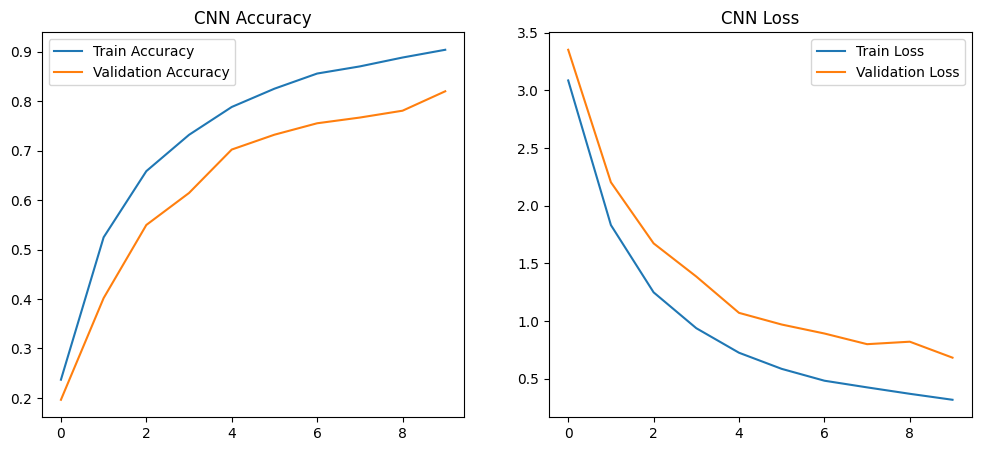

In [44]:
# Plot training history for CNN
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.legend()

plt.show()

# LSTM Model

In [46]:
from tensorflow.keras.layers import LSTM, Reshape

lstm_model = models.Sequential([
    # Scale pixel values
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    # Reshape image to a sequence: (time_steps, features)
    # 32x32x3 = 3072, so we can choose a time step length, e.g., 96 steps of 32 features each.
    # You can experiment with different reshaping strategies.
    Reshape((96, 32)),  # Here 96 * 32 = 3072
    LSTM(128, activation='tanh'),
    layers.Dense(num_classes, activation='softmax') # Use num_classes instead of train_ds.num_classes
])

lstm_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

lstm_history = lstm_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 29s 148ms/step - accuracy: 0.0839 - loss: 3.6385 - val_accuracy: 0.0231 - val_loss: 4.0639
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.1280 - loss: 3.4543 - val_accuracy: 0.0277 - val_loss: 4.0391
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 25s 139ms/step - accuracy: 0.1382 - loss: 3.3646 - val_accuracy: 0.0577 - val_loss: 3.9982
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - accuracy: 0.1609 - loss: 3.2458 - val_accuracy: 0.0739 - val_loss: 3.8964
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.2020 - loss: 3.0640 - val_accuracy: 0.0855 - val_loss: 3.8050
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step - accuracy: 0.2419 - loss: 2.8796 - val_accuracy: 0.1085 - val_loss: 3.6842
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 147ms/step - accuracy: 0.2812 - loss: 2.7029 - val_accuracy: 0.1316 - val_loss: 3.6199
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 141ms/step - accuracy: 0.3346 - loss: 2.4940 - val

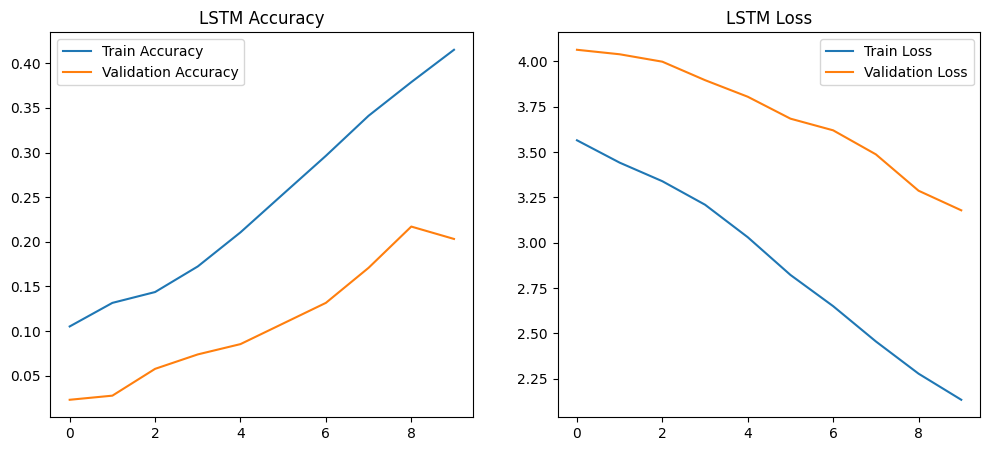

In [47]:
# Plot training history for LSTM
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Loss')
plt.legend()

plt.show()

# XLSTM Model

In [49]:
xlstm_model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(32, 32, 3)),
    Reshape((96, 32)),
    LSTM(128, activation='tanh', return_sequences=True),  # first LSTM with sequence output
    LSTM(64, activation='tanh'),  # second LSTM processing the sequence
    layers.Dense(len(train_ds.class_names), activation='softmax') # Use len(train_ds.class_names) instead of train_ds.num_classes
])

xlstm_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

xlstm_history = xlstm_model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 206ms/step - accuracy: 0.0852 - loss: 3.6756 - val_accuracy: 0.0208 - val_loss: 4.0748
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 40s 203ms/step - accuracy: 0.1202 - loss: 3.4893 - val_accuracy: 0.0323 - val_loss: 4.0275
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 41s 203ms/step - accuracy: 0.1291 - loss: 3.4098 - val_accuracy: 0.0416 - val_loss: 4.0117
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 36s 202ms/step - accuracy: 0.1601 - loss: 3.2349 - val_accuracy: 0.0670 - val_loss: 3.8978
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 195ms/step - accuracy: 0.1911 - loss: 3.0324 - val_accuracy: 0.0901 - val_loss: 3.6721
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 42s 203ms/step - accuracy: 0.2507 - loss: 2.7756 - val_accuracy: 0.1132 - val_loss: 3.5180
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 199ms/step - accuracy: 0.3015 - loss: 2.6107 - val_accuracy: 0.1363 - val_loss: 3.4471
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 35s 196ms/step - accuracy: 0.3534 - loss: 2.4323 - val

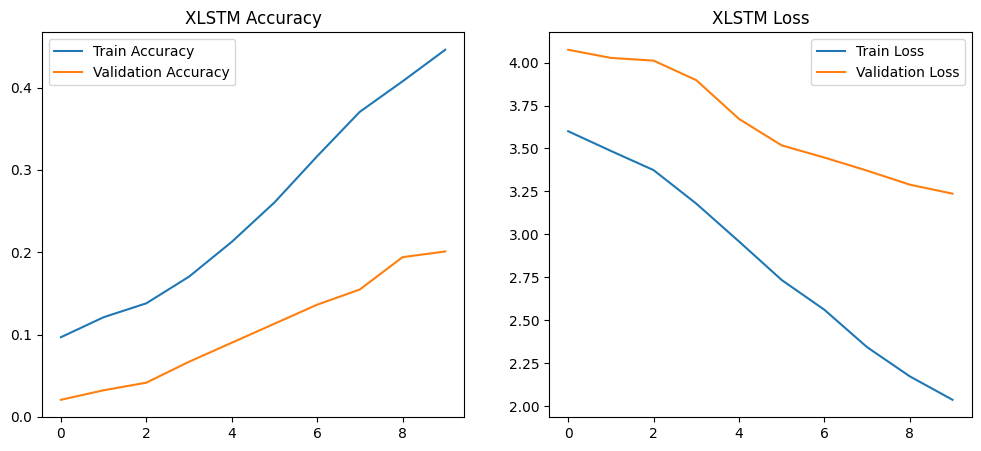

In [50]:
# Plot training history for XLSTM
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(xlstm_history.history['accuracy'], label='Train Accuracy')
plt.plot(xlstm_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('XLSTM Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(xlstm_history.history['loss'], label='Train Loss')
plt.plot(xlstm_history.history['val_loss'], label='Validation Loss')
plt.title('XLSTM Loss')
plt.legend()

plt.show()

# Confusion Matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

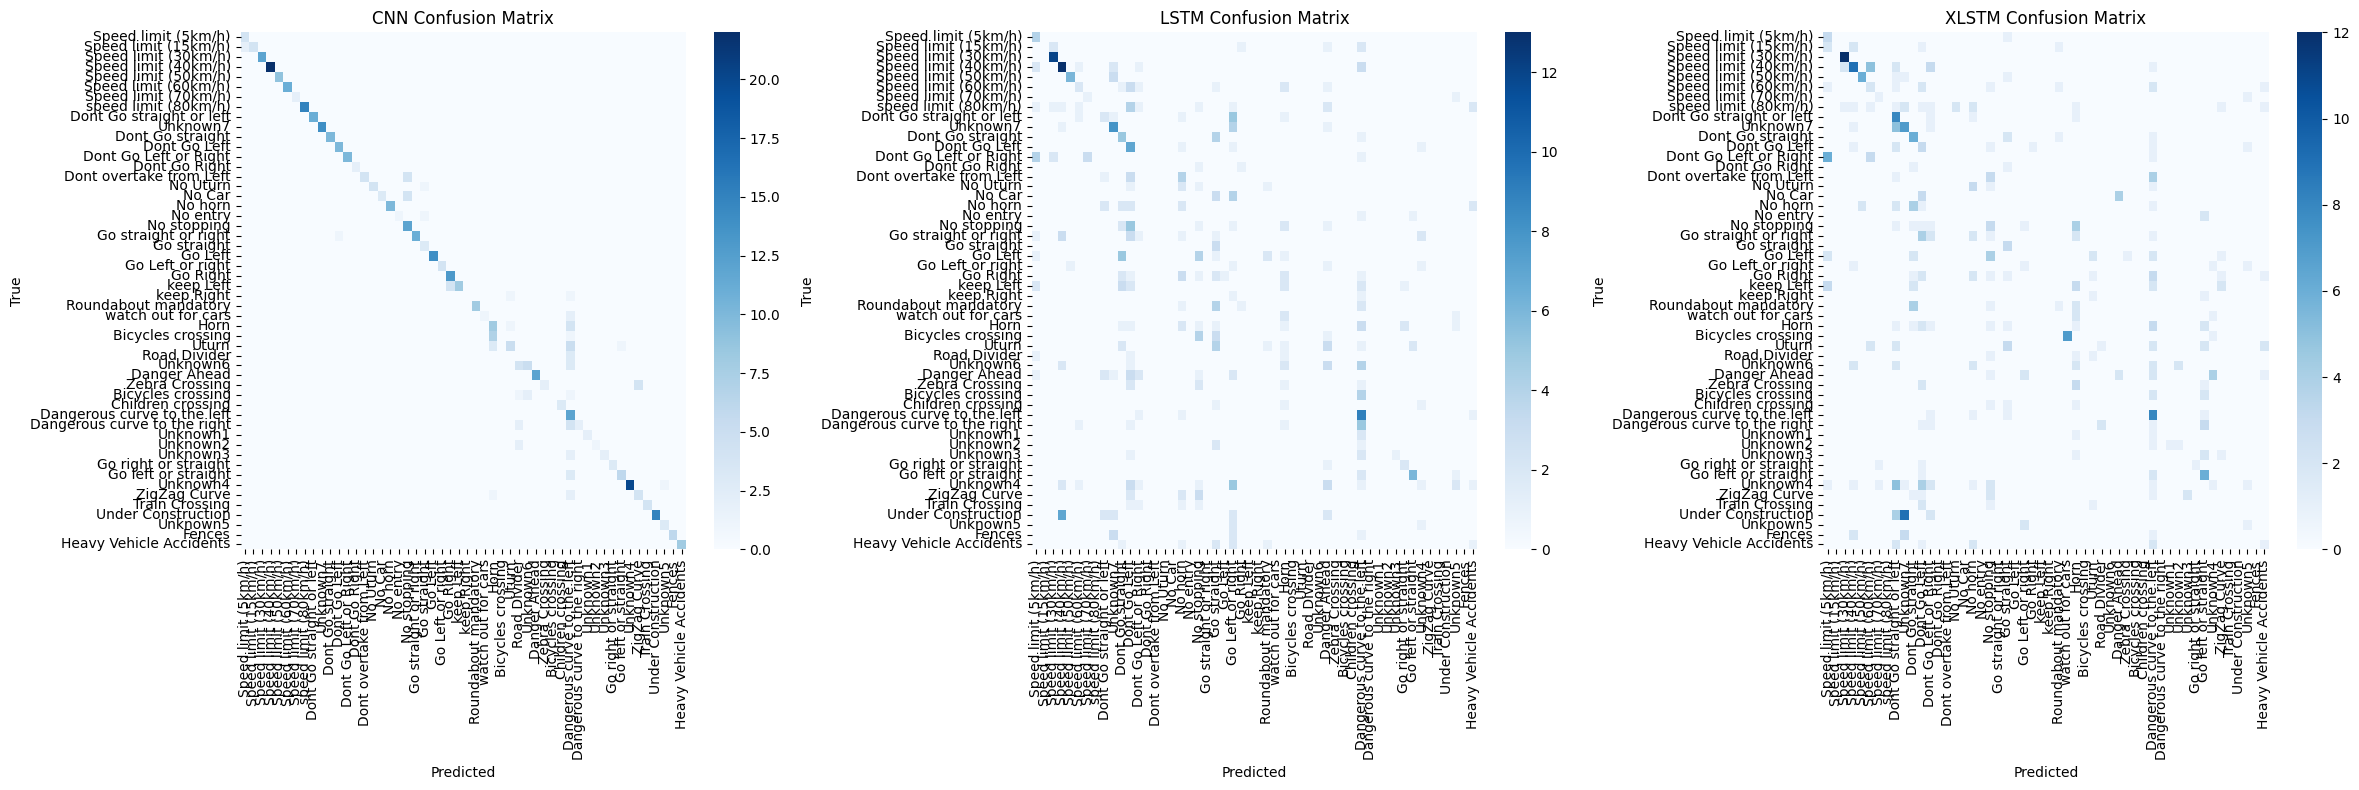

In [64]:
def get_preds_and_labels(model, dataset):
    y_pred, y_true = [], []
    for images, labels in dataset:
        preds = model.predict(images)
        y_pred.extend(np.argmax(preds, axis=1))
        y_true.extend(np.argmax(labels.numpy(), axis=1))
    return np.array(y_true), np.array(y_pred)

def plot_confusion_matrix(cm, class_names, title, ax):
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Optional: Get readable class names
class_names = class_mapping_df.sort_values("ClassId")["Name"].tolist()

# Get confusion matrices for each model
y_true_cnn, y_pred_cnn = get_preds_and_labels(cnn_model, test_ds)
y_true_lstm, y_pred_lstm = get_preds_and_labels(lstm_model, test_ds)
y_true_xlstm, y_pred_xlstm = get_preds_and_labels(xlstm_model, test_ds)

cm_cnn = confusion_matrix(y_true_cnn, y_pred_cnn)
cm_lstm = confusion_matrix(y_true_lstm, y_pred_lstm)
cm_xlstm = confusion_matrix(y_true_xlstm, y_pred_xlstm)

# Plot side-by-side confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

plot_confusion_matrix(cm_cnn, class_names, "CNN Confusion Matrix", axes[0])
plot_confusion_matrix(cm_lstm, class_names, "LSTM Confusion Matrix", axes[1])
plot_confusion_matrix(cm_xlstm, class_names, "XLSTM Confusion Matrix", axes[2])

plt.tight_layout()
plt.show()


# Precision/Recall/F1-Score

In [77]:
# CNN
acc_cnn = accuracy_score(y_true_cnn, y_pred_cnn)
report_cnn = classification_report(y_true_cnn, y_pred_cnn, target_names=class_names, output_dict=True)

# LSTM
acc_lstm = accuracy_score(y_true_lstm, y_pred_lstm)
report_lstm = classification_report(y_true_lstm, y_pred_lstm, target_names=class_names, output_dict=True)

# XLSTM
acc_xlstm = accuracy_score(y_true_xlstm, y_pred_xlstm)
report_xlstm = classification_report(y_true_xlstm, y_pred_xlstm, target_names=class_names, output_dict=True)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [78]:
summary_df = pd.DataFrame({
    'Model': ['CNN', 'LSTM', 'XLSTM'],
    'Accuracy': [acc_cnn, acc_lstm, acc_xlstm],
    'Precision': [
        report_cnn['macro avg']['precision'],
        report_lstm['macro avg']['precision'],
        report_xlstm['macro avg']['precision']
    ],
    'Recall': [
        report_cnn['macro avg']['recall'],
        report_lstm['macro avg']['recall'],
        report_xlstm['macro avg']['recall']
    ],
    'F1-score': [
        report_cnn['macro avg']['f1-score'],
        report_lstm['macro avg']['f1-score'],
        report_xlstm['macro avg']['f1-score']
    ]
})

# Round and display
summary_df = summary_df.round(4)
print(summary_df)

   Model  Accuracy  Precision  Recall  F1-score
0    CNN    0.8199     0.8419  0.7655    0.7715
1   LSTM    0.2032     0.1270  0.1925    0.1301
2  XLSTM    0.2009     0.1319  0.1925    0.1371


# Predicting from a Single Image

In [83]:
from PIL import Image
def preprocess_image(img_path, img_size=(32, 32)): # Change img_size to (32, 32)
    img = Image.open(img_path).convert('RGB')
    img = img.resize(img_size)
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

def predict_image(model, img_array, class_names):
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    predicted_label = class_names[predicted_class]
    confidence = np.max(prediction) * 100

    return predicted_label, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


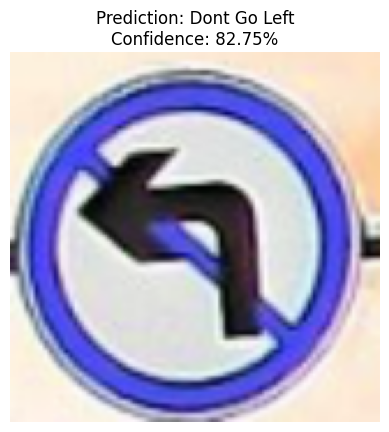

In [85]:
# Load image
img_path = "/kaggle/input/traffic-signs-dataset/TEST/11/011_0003_j.png"
img_array = preprocess_image(img_path)

# Pick a model
model = cnn_model  # or lstm_model, xlstm_model

# Predict
predicted_label, confidence = predict_image(model, img_array, class_names)

# Display result
plt.imshow(Image.open(img_path))
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%")
plt.axis('off')
plt.show()
